In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
import nltk
from collections import Counter
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import plotly.graph_objects as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from arch import arch_model
import yfinance as yfin
from datetime import datetime, timedelta, date
import plotly.io as pio
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:

# Download stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

In [4]:
aggregated = pd.read_pickle('../data/Aggregated.pkl')

In [5]:
record_table = aggregated['tick'].value_counts().reset_index()
record_table[record_table['tick'] =='XTNT']

,tick,count
2271,XTNT,29


In [6]:
aggregated

,id,url,file_from,tagged,transcript,clean,date,stock,tick,meeting_date,close,volume,sma50_close,sma200_close,sma50_vol,sma200_vol,target
0,0,https://seekingalpha.com/article/4468898-xtant...,0005,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 2...",xtant medical xtnt partners financial xtant fi...,2021-11-12,NYSE,XTNT,2021-11-12,1.100000,70500.0,1.154400,1.672250,140486.00,1663013.000,0
1,1,https://seekingalpha.com/article/4468886-uni-s...,0005,Uni-Select Inc. (OTCPK:UNIEF) Q3 2021 Earnings...,[Uni-Select Inc. (OTCPK:UNIEF) Q3 2021 Earning...,otcpk unief legal corporate secretary financia...,2021-11-12,OTCPK,UNIEF,2021-11-12,16.000000,10852.0,14.278522,11.600599,457.12,156.755,1
2,3,https://seekingalpha.com/article/4468882-dents...,0005,Dentsu Group Inc. (OTCPK:DNTUF) Q3 2021 Earnin...,[Dentsu Group Inc. (OTCPK:DNTUF) Q3 2021 Earni...,dentsu otcpk dntuf dentsu network dentsu inter...,2021-11-12,OTCPK,DNTUF,2021-11-12,-28.342836,14267.0,-26.778371,-25.616853,352.42,356.645,0
3,4,https://seekingalpha.com/article/4468879-sgl-c...,0005,SGL Carbon SE (OTCPK:SGLFF) Q3 2021 Earnings C...,[SGL Carbon SE (OTCPK:SGLFF) Q3 2021 Earnings ...,sgl otcpk sglff kellert investor dippold finan...,2021-11-12,OTCPK,SGLFF,2021-11-11,10.830000,400.0,10.796200,9.320700,240.00,318.000,1
4,5,https://seekingalpha.com/article/4468877-konin...,0005,Koninklijke Vopak N.V. (OTCPK:VOPKF) Q3 2021 E...,[Koninklijke Vopak N.V. (OTCPK:VOPKF) Q3 2021 ...,koninklijke vopak otcpk vopkf investor hoekstr...,2021-11-12,OTCPK,VOPKF,2021-11-12,38.812000,0.0,40.800520,45.000936,664.00,695.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,24912,https://seekingalpha.com/article/4445480-arcos...,0200,"Arcosa, Inc. (NYSE:ACA) Q2 2021 Earnings Confe...","[Arcosa, Inc. (NYSE:ACA) Q2 2021 Earnings Conf...",arcosa zaffino thielman sidoti bergner gabelli...,2021-08-05,NYSE,ACA,2021-08-05,51.318615,468700.0,57.036444,58.085233,213020.00,259963.500,0
16762,24913,https://seekingalpha.com/article/4445479-renew...,0200,"Renewable Energy Group, Inc. (REGI) Q2 2021 Ea...","[Renewable Energy Group, Inc. (REGI) Q2 2021 E...",financial treasurer bealmear financial credit ...,2021-08-05,noInfo,REGI,2021-08-05,61.500000,1284541.0,63.793400,69.368850,889098.92,1178279.620,0
16763,24914,https://seekingalpha.com/article/4445472-becto...,0200,Becton Dickinson and Company (NYSE:BDX) Q3 202...,[Becton Dickinson and Company (NYSE:BDX) Q3 20...,investor administrative medical interventional...,2021-08-05,NYSE,BDX,2021-08-05,235.513428,2559118.0,238.028843,237.354383,1341805.20,1391044.180,1
16764,24916,https://seekingalpha.com/article/4445469-bce-i...,0200,BCE Inc. (NYSE:BCE) Q2 2021 Earnings Conferenc...,[BCE Inc. (NYSE:BCE) Q2 2021 Earnings Conferen...,fotopoulos bibic financial securities galappat...,2021-08-05,NYSE,BCE,2021-08-05,48.833820,1588200.0,47.849117,43.219273,1073116.00,1246412.000,1


In [7]:
xtnt_table = aggregated[aggregated['tick'] == 'XTNT'].sort_values(by = 'meeting_date')
xtnt_table['id'] = xtnt_table['meeting_date'].astype('str')
xtnt_table

,id,url,file_from,tagged,transcript,clean,date,stock,tick,meeting_date,close,volume,sma50_close,sma200_close,sma50_vol,sma200_vol,target
4848,2016-03-16,https://seekingalpha.com/article/3958961-xtant...,0135,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...",xtant medical xtnt cockrell cockrell goldberge...,2016-03-16,NYSE,XTNT,2016-03-16,39.360001,7100.0,32.0544,37.77720,996.44,1250.055,0
13254,2016-05-05,https://seekingalpha.com/article/3972886-xtant...,0200,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...",xtant medical xtnt goldberger financial analys...,2016-05-08,NYSE,XTNT,2016-05-05,26.760000,3592.0,31.3968,35.63280,4715.04,1993.355,0
1697,2016-08-02,https://seekingalpha.com/article/3994863-xtant...,0095,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...",xtant medical xtnt goldberger analysts wittes ...,2016-08-02,NYSE,XTNT,2016-08-02,19.680000,2833.0,23.4768,29.73960,1705.16,2462.625,0
3148,2016-11-08,https://seekingalpha.com/article/4021176-xtant...,0155,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 2...",xtant medical xtnt goldberger analysts swayamp...,2016-11-08,NYSE,XTNT,2016-11-08,9.120000,3742.0,12.8016,22.86660,7629.82,4481.175,0
1182,2017-03-10,https://seekingalpha.com/article/4054170-xtant...,0165,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...",xtant medical xtnt financial analysts xtant me...,2017-03-10,NYSE,XTNT,2017-03-10,6.840000,249050.0,5.9448,13.21560,69347.34,25283.665,0
2430,2017-05-10,https://seekingalpha.com/article/4072924-xtant...,0095,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...",xtant medical xtnt xtant medical recorded xtan...,2017-05-13,NYSE,XTNT,2017-05-10,4.800000,52625.0,6.7992,9.58560,78072.46,33388.825,0
407,2017-08-10,https://seekingalpha.com/article/4097509-xtant...,0055,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...",xtant medical xtnt analysts xtant medical reco...,2017-08-10,NYSE,XTNT,2017-08-10,9.000000,176725.0,8.4144,6.97440,60440.34,51909.635,1
1369,2018-04-03,https://seekingalpha.com/article/4160804-xtant...,0155,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...",xtant medical xtnt restructuring analysts vend...,2018-04-03,NYSE,XTNT,2018-04-03,7.320000,31900.0,6.5844,7.81470,86709.14,47574.405,0
1539,2018-05-09,https://seekingalpha.com/article/4171823-xtant...,0155,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...",xtant medical xtnt restructuring analysts xtan...,2018-05-09,NYSE,XTNT,2018-05-09,6.680000,7500.0,7.5172,7.70890,57598.00,42841.860,0
1237,2018-08-08,https://seekingalpha.com/article/4198071-xtant...,0045,"Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 20...","[Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...",xtant medical xtnt restructuring analysts scha...,2018-08-11,NYSE,XTNT,2018-08-08,5.900000,2800.0,5.9308,6.79475,20512.00,38064.520,0


In [8]:
xtnt_table['transcript']

4848     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...
13254    [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...
1697     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...
3148     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 2...
1182     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...
2430     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...
407      [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...
1369     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...
1539     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...
1237     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...
2144     [Xtant Medical Holdings, Inc (NYSE:XTNT) Q3 20...
1590     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...
4728     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q1 2...
6129     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q2 2...
490      [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q3 2...
2441     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2...
6399     [Xtant Medical Holdings, Inc. (NYSE:XTNT) Q4 2.

In [9]:
def lm_sentiment_score(text: str=None)-> dict:

    # intialize dictionary
    sentiment_dict = {'LM_Positive':[], 'LM_Negative':[], 'LM_Uncertainty':[]}
    
    # Initialize sentiment scores
    pos_score = 0
    neg_score = 0
    uncertain_score = 0
    
    # upload Loughran-McDonald sentiment dataset
    #lm_dataframe = pd.read_csv('../data/LoughranMcDonald/LM-SA-2020.csv') # origiinal path 
    lm_dataframe = pd.read_csv('../data/LM_MasterDict/LM-SA-2020.csv')    # replication path: Jun 23 2025


    for token in text:
        if token in lm_dataframe['word'].to_list():
            token_row = lm_dataframe[lm_dataframe['word'] == token]
            lm_sent = token_row.iloc[0]['sentiment']
            if lm_sent == 'Positive':
                pos_score+=1
            elif lm_sent == 'Negative':
                neg_score+=1
            elif lm_sent == 'Uncertainty':
                uncertain_score+=1
        else:
            pass
    sentiment_dict['LM_Positive'].append(pos_score)
    sentiment_dict['LM_Negative'].append(neg_score)
    sentiment_dict['LM_Uncertainty'].append(uncertain_score)

    return sentiment_dict


def compute_lm_sentiment(dataframe: pd.DataFrame=None)-> pd.DataFrame:
    results = []
    for ind, row in enumerate(dataframe.to_dict('records')):
        if ind%10==0:
            print(f'printing: {ind}')
        text = row['clean']
        my_sent = lm_sentiment_score(text=text)
        df = pd.DataFrame(my_sent)
        
        results.append(df)
    
    results_concat = pd.concat(results, axis=0)
    results_concat = results_concat.reset_index(drop=True)

    return results_concat

In [10]:
results = []
for ind, row in enumerate(xtnt_table.to_dict('records')):
    if ind%10==0:
        pass
        #print(f'printing: {ind}')
    text = row['clean']
    text = word_tokenize(text)
    my_sent = lm_sentiment_score(text=text)
    df = pd.DataFrame(my_sent)
        
    results.append(df)
    
xtnt_lm = pd.concat(results, axis=0)
xtnt_lm = xtnt_lm.reset_index(drop=True)
print(xtnt_lm)

    LM_Positive  LM_Negative  LM_Uncertainty
0            27           26              13
1            39           61              19
2            20           29              14
3            23           30              17
4            22           16              19
5            25           22              12
6            31           36              21
7            36           51               9
8            19           29              10
9            28           32               7
10           10           11               3
11           17           21               5
12           12            6               5
13           13           12               5
14           23            4               5
15            9           22               3
16           10            9               8
17            8            9               8
18            5            8               5
19           16           19               9
20           14           11               5
21        

### Topic Modeing

In [11]:
xtnt_tokenized = xtnt_table['clean'].apply(lambda x: x.split())

In [12]:
xtnt_tokenized.to_list()

[['xtant',
  'medical',
  'xtnt',
  'cockrell',
  'cockrell',
  'goldberger',
  'financial',
  'analysts',
  'wittes',
  'securities',
  'swayampakula',
  'grisewood',
  'xtant',
  'medical',
  'recorded',
  'cockrell',
  'cockrell',
  'cockrell',
  'xtant',
  'medical',
  'goldberger',
  'xtant',
  'financial',
  'announcing',
  'financial',
  'slide',
  'management',
  'duration',
  'approximately',
  'management',
  'performance',
  'xtant',
  'identified',
  'guarantees',
  'performance',
  'uncertainties',
  'unaudited',
  'financial',
  'purport',
  'project',
  'financial',
  'operating',
  'materially',
  'recorded',
  'approximately',
  'announcements',
  'topics',
  'releases',
  'filings',
  'xtant',
  'declines',
  'obligation',
  'applicable',
  'goldberger',
  'traded',
  'bacterin',
  'privately',
  'systems',
  'xtant',
  'medical',
  'exchange',
  'xtnt',
  'kirschman',
  'fixation',
  'products',
  'outside',
  'processing',
  'outside',
  'administrative',
  'outside

In [13]:
# Create corpus
dictionary = corpora.Dictionary(xtnt_tokenized)
# Create Bag-of-Words corpus
corpus = [dictionary.doc2bow(doc) for doc in xtnt_tokenized]

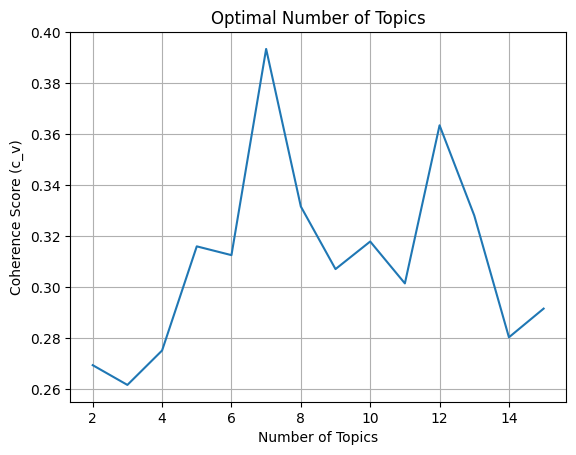

Best number of topics: 7


In [14]:
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit + 1, step):
        model = models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        model_list.append(model)

        coherence_model = models.CoherenceModel(
            model=model,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence = coherence_model.get_coherence()
        coherence_values.append(coherence)

    return model_list, coherence_values

# Run model selection
model_list, coherence_values = compute_coherence_values(dictionary, corpus, xtnt_tokenized, start=2, limit=15, step=1)

# Plot the coherence scores
x = range(2, 16)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Optimal Number of Topics")
plt.grid(True)
plt.show()

# Optional: find the best number of topics
best_n = x[coherence_values.index(max(coherence_values))]
print(f"Best number of topics: {best_n}")

In [15]:

NUM_TOPICS = 7  # Adjust the number of topics as per your need
lda_model = models.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15) # time:

In [16]:
# print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n') #Words: 0.033*"market"

Topic: 0 
Words: 0.033*"financial" + 0.032*"xtant" + 0.025*"product" + 0.024*"revenue" + 0.023*"products" + 0.023*"expenses" + 0.016*"market" + 0.013*"medical" + 0.012*"operating" + 0.010*"performance"

Topic: 1 
Words: 0.001*"product" + 0.001*"revenue" + 0.001*"expenses" + 0.001*"financial" + 0.001*"xtant" + 0.001*"products" + 0.001*"procedures" + 0.001*"medical" + 0.001*"market" + 0.001*"elective"

Topic: 2 
Words: 0.001*"revenue" + 0.001*"product" + 0.001*"xtant" + 0.001*"medical" + 0.001*"financial" + 0.001*"approximately" + 0.001*"expenses" + 0.001*"ebitda" + 0.001*"partners" + 0.001*"market"

Topic: 3 
Words: 0.001*"financial" + 0.001*"xtant" + 0.001*"revenue" + 0.001*"product" + 0.001*"expenses" + 0.001*"medical" + 0.001*"products" + 0.001*"operating" + 0.001*"approximately" + 0.001*"goldberger"

Topic: 4 
Words: 0.001*"xtant" + 0.001*"revenue" + 0.001*"product" + 0.001*"goldberger" + 0.001*"products" + 0.001*"ebitda" + 0.001*"operating" + 0.001*"financial" + 0.001*"medical" + 0

In [17]:
# Generate topic proportions for each document in the topics
topic_proportions = []

# loading from pretrained model
for doc_bow in corpus:
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    topic_proportions.append([prob for _, prob in doc_topics])

# Create a DataFrame for topic proportions
topics_labels = [f'Topic_{i+1}' for i in range(lda_model.num_topics)]
xtnt_topic = pd.DataFrame(topic_proportions, columns=topics_labels)
xtnt_topic

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7
0,0.000232,0.000231,0.000231,0.000231,0.000231,0.998612,0.000232
1,0.000154,0.000154,0.000154,0.000154,0.000154,0.999077,0.000154
2,0.000318,0.000317,0.000317,0.000317,0.000317,0.998098,0.000317
3,0.000307,0.000306,0.000306,0.000306,0.000306,0.998162,0.000307
4,0.000429,0.000428,0.000428,0.000428,0.000428,0.997431,0.000429
5,0.000394,0.000393,0.000393,0.000393,0.000393,0.997642,0.000393
6,0.000293,0.000292,0.000292,0.000292,0.000292,0.998245,0.000293
7,0.000276,0.000275,0.000275,0.000275,0.000275,0.998346,0.000276
8,0.000464,0.000462,0.000462,0.000462,0.000462,0.997222,0.000464
9,0.009140,0.000349,0.000349,0.000349,0.000349,0.989112,0.000351


### VADER

In [18]:
vader_analyzer = SentimentIntensityAnalyzer()

def apply_vader_sentiment(dataframe: pd.DataFrame=None):
    output_dict = {'neg':[],'neu':[],'pos':[]}
    for idx, row in enumerate(dataframe.to_dict('records')):
        if idx%5==0:
            print(f'working on the: {idx}')
        text = [ line.strip() for line in row['transcript']]  # stript escape line character s
        single_sentence = ' '.join(text)
        sentiment_scores = vader_analyzer.polarity_scores(single_sentence)
        output_dict['neg'].append(sentiment_scores['neg'])
        output_dict['neu'].append(sentiment_scores['neu'])
        output_dict['pos'].append(sentiment_scores['pos'])
     
    return pd.DataFrame(output_dict)

In [19]:
xtnt_vader = apply_vader_sentiment(dataframe=xtnt_table)

working on the: 0
working on the: 5
working on the: 10
working on the: 15
working on the: 20
working on the: 25


In [20]:
xtnt_sentiment = pd.concat([xtnt_lm, xtnt_topic, xtnt_vader], axis = 1)

In [21]:
xtnt_meeting_date = xtnt_table[['date', 'meeting_date']].reset_index(drop=True)

In [22]:
xtnt_meeting_date['meeting_date'].dt.date.min()

datetime.date(2016, 3, 16)

In [23]:
start = xtnt_meeting_date['meeting_date'].dt.date.min()
end = xtnt_meeting_date['meeting_date'].dt.date.max()

In [24]:
end

datetime.date(2023, 5, 4)

In [25]:
def get_closing_data(ticker: str='AAPL', meeting_date: date = datetime(2020,2,2), end: date = datetime(2023,2,2) ) -> pd.DataFrame:
    '''
    Example: 
    ticker: 'AAPL'
    meeting_date: datetime.date, '2020-01-01' 
    id_vars = datetime.date 
    var names: close, DMA50, and DMA200 from wide to long format
    value: simple moving average and close price of ticker
    returns: pd.melted dataframe 

    
    '''
    days_go_back = timedelta(700)
    ten_days_later = timedelta(20)

    start = meeting_date - days_go_back
    end = end + ten_days_later
    one_day = '1d'

    ticker = yfin.Ticker(ticker)

    data = ticker.history(start=start,  end=end, period=one_day) # auto_adjust = True
    data = data.reset_index(inplace=False)
    data['Date'] = data['Date'].apply(lambda x: x.date())
    return data


get_closing_data(ticker='F')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-03-05,7.068406,7.287793,7.061550,7.253514,44021300,0.0,0.0
1,2018-03-06,7.301506,7.322074,7.178101,7.287795,30978900,0.0,0.0
2,2018-03-07,7.205524,7.294651,7.150677,7.287795,30046600,0.0,0.0
3,2018-03-08,7.301504,7.322072,7.184954,7.274080,26948000,0.0,0.0
4,2018-03-09,7.287793,7.356351,7.246658,7.356351,26684400,0.0,0.0
...,...,...,...,...,...,...,...,...
1246,2023-02-14,11.147063,11.318688,11.001181,11.129901,75352900,0.0,0.0
1247,2023-02-15,10.941113,11.104157,10.812395,11.095576,65850000,0.0,0.0
1248,2023-02-16,10.923951,11.275784,10.735164,11.078414,64145500,0.0,0.0
1249,2023-02-17,11.001182,11.104157,10.855301,11.061252,54401000,0.0,0.0


In [26]:
xtnt_stock = get_closing_data(ticker='XTNT', meeting_date = start, end = end)

In [27]:
sma50 = xtnt_stock['Close'].rolling(50).mean()
sma200 = xtnt_stock['Close'].rolling(200).mean()

xtnt_stock['sma50'] = sma50
xtnt_stock['sma200'] = sma200

In [28]:
xtnt_stock['Date'] = pd.to_datetime(xtnt_stock['Date'])

In [29]:
xtnt_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2292 non-null   datetime64[ns]
 1   Open          2292 non-null   float64       
 2   High          2292 non-null   float64       
 3   Low           2292 non-null   float64       
 4   Close         2292 non-null   float64       
 5   Volume        2292 non-null   int64         
 6   Dividends     2292 non-null   float64       
 7   Stock Splits  2292 non-null   float64       
 8   sma50         2243 non-null   float64       
 9   sma200        2093 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 179.2 KB


In [30]:
xtnt_stock['id'] = xtnt_stock['Date'].astype('str')

In [48]:
# Define your event dates for vertical lines
event_dates = xtnt_meeting_date['meeting_date']

# Create figure
fig = go.Figure()

# Plot Open and Close
fig.add_trace(go.Scatter(x=xtnt_stock['Date'], y=xtnt_stock['Open'], name='Open', mode='lines'))
fig.add_trace(go.Scatter(x=xtnt_stock['Date'], y=xtnt_stock['Close'], name='Close', mode='lines'))

# Add vertical lines for each event
for date in event_dates:
    fig.add_vline(x=date, line_width=1, line_dash='dash', line_color='red')

# Update layout
fig.update_layout(
    title='XTNT Open/Close with Event Markers',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show plot
#pio.write_html(fig, '/Users/alina/Desktop/ClosePriceEvents.html', full_html=True)
fig.show()

In [32]:
xtnt_meeting_sent = pd.concat([xtnt_meeting_date, xtnt_sentiment], axis=1)
xtnt_meeting_sent['id'] = xtnt_meeting_sent['meeting_date'].astype('str')

In [33]:
Returns = 100 * xtnt_stock['Close'].pct_change()
xtnt_stock['Returns'] = Returns


In [34]:
xtnt_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,id,Returns
0,2014-04-16,79.199997,84.000000,75.599998,84.000000,1505,0.0,0.0,NaN,NaN,2014-04-16,NaN
1,2014-04-17,84.000000,85.199997,81.599998,84.000000,1791,0.0,0.0,NaN,NaN,2014-04-17,0.000000
2,2014-04-21,84.000000,85.199997,81.599998,84.000000,2140,0.0,0.0,NaN,NaN,2014-04-21,0.000000
3,2014-04-22,102.000000,102.000000,80.400002,82.800003,6539,0.0,0.0,NaN,NaN,2014-04-22,-1.428568
4,2014-04-23,87.599998,87.599998,82.800003,82.800003,3863,0.0,0.0,NaN,NaN,2014-04-23,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2023-05-17,0.610000,0.630000,0.610000,0.630000,7600,0.0,0.0,0.6552,0.65565,2023-05-17,0.000000
2288,2023-05-18,0.650000,0.660000,0.600000,0.600000,4100,0.0,0.0,0.6496,0.65610,2023-05-18,-4.761900
2289,2023-05-19,0.620000,0.640000,0.600000,0.640000,4100,0.0,0.0,0.6470,0.65670,2023-05-19,6.666660
2290,2023-05-22,0.630000,0.630000,0.600000,0.630000,5300,0.0,0.0,0.6448,0.65725,2023-05-22,-1.562499


In [35]:
# Fit GARCH(1,1)
model = arch_model(xtnt_stock['Returns'].dropna(), vol='GARCH', p=1, q=1)
garch_result = model.fit(disp='off')

# Print summary
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7658.70
Distribution:                  Normal   AIC:                           15325.4
Method:            Maximum Likelihood   BIC:                           15348.3
                                        No. Observations:                 2291
Date:                Tue, Jul 22 2025   Df Residuals:                     2290
Time:                        13:52:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3462      0.384     -0.902      0.367 [ -1.098,  0.40

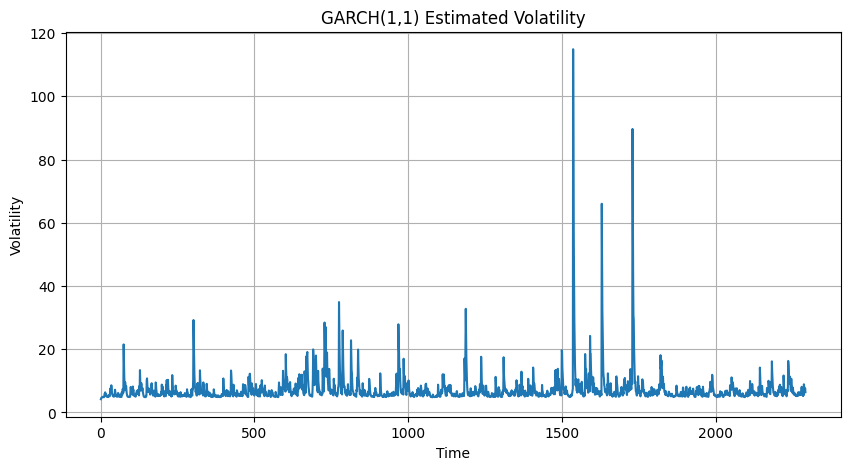

In [36]:

# Plot the conditional volatility
plt.figure(figsize=(10, 5))
plt.plot(garch_result.conditional_volatility)
plt.title("GARCH(1,1) Estimated Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

In [47]:
# Create DataFrame for plotting
vol_df = pd.DataFrame({
    'Date': xtnt_stock['Date'].iloc[-len(garch_result.conditional_volatility):].values,
    'Volatility': garch_result.conditional_volatility
})

# Slice data by date (e.g., post-2016 only)
vol_slice = vol_df[vol_df['Date'] >= pd.to_datetime('2016-01-01')]

# Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=vol_df['Date'],
    y=vol_df['Volatility'],
    mode='lines',
    name='Conditional Volatility'
))

fig.add_trace(go.Scatter(
    x=vol_slice['Date'],
    y=vol_slice['Volatility'],
    mode='lines',
    name='Conditional Volatility'
))

# Add vertical lines for each event
for date in event_dates:
    fig.add_vline(x=date, line_width=1, line_dash='dash', line_color='red')
'''
fig.update_layout(
    title='GARCH(1,1) Estimated Volatility',
    xaxis_title='Date',
    yaxis_title='Volatility (%)',
    template='plotly_white',
    showlegend=True
)'''

fig.update_layout(
    title='GARCH(1,1) Estimated Volatility',
    xaxis_title='Date',
    yaxis_title='Volatility (%)',
    template='plotly_white',
    showlegend=True,

    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    )
)
#pio.write_html(fig, '/Users/alina/Desktop/EstimatedVolatility.html', full_html=True)
fig.show()

In [46]:
# Create aligned DataFrame
vol_df = pd.DataFrame({
    'Date': xtnt_stock['Date'].iloc[-len(garch_result.conditional_volatility):].values,
    'Volatility': garch_result.conditional_volatility,
    'Return': xtnt_stock.Returns.iloc[-len(garch_result.conditional_volatility):].values
})
vol_df = vol_df.dropna()

# Plotly figure with two y-axes
fig = go.Figure()

# Returns trace (left y-axis)
fig.add_trace(go.Scatter(
    x=vol_df['Date'],
    y=vol_df['Return'],
    mode='lines',
    name='Return (%)',
    yaxis='y1',
    line=dict(color='blue')
))

# Volatility trace (right y-axis)
fig.add_trace(go.Scatter(
    x=vol_df['Date'],
    y=vol_df['Volatility'],
    mode='lines',
    name='GARCH Volatility',
    yaxis='y2',
    line=dict(color='red')
))

# Add vertical lines for each event
for date in event_dates:
    fig.add_vline(x=date, line_width=1, line_dash='dash', line_color='green')

# Dummy trace for legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    name='Meeting Date',
    line=dict(color='green', dash='dash')
))

# --- ADDING THE GRAY RECTANGLE ---
start_date_rect = '2020-02-20'
end_date_rect = '2020-03-31' # Approximating "late March"

fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",  # yref="paper" spans the entire height of the plot area
    x0=start_date_rect,
    y0=0,
    x1=end_date_rect,
    y1=1,
    fillcolor="rgba(128,128,128,0.3)", # Gray color with 30% opacity
    layer="below", # Ensure the rectangle is behind the lines
    line_width=0, # No border line
)

# Update layout with dual y-axis
fig.update_layout(
    title='Xtant Medical Holdings Inc: Returns and GARCH(1,1) Volatility',
    template='plotly_white',
    xaxis=dict(
        title='Date',
        rangeslider=dict(visible=True)
    ),
    yaxis=dict(
        title='Return (%)',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Volatility (%)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99)
)
#pio.write_image(fig, '/Users/alina/Desktop/BigPicture.pdf', format='pdf', width=800, height=600, scale=2)
fig.show()
#pio.write_html(fig, '/Users/alina/Desktop/BigPicture.html', full_html=True)

In [39]:
xtnt_stock[xtnt_stock['Date'] == datetime(2016,5,5)]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma50,sma200,id,Returns
517,2016-05-05,27.120001,28.440001,26.16,26.76,3592,0.0,0.0,31.3968,35.6328,2016-05-05,-0.888888


In [40]:
my_columns = ['meeting_date', 'LM_Positive', 'LM_Negative', 'LM_Uncertainty',
       'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6',
       'Topic_7', 'neg', 'neu', 'pos', 'Close', 'Volume', 'sma50', 'sma200','Returns']
xtnt = pd.merge(xtnt_meeting_sent, xtnt_stock, on = 'id', how = 'left')[my_columns]

In [41]:
xtnt.describe()

,meeting_date,LM_Positive,LM_Negative,LM_Uncertainty,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,neg,neu,pos,Close,Volume,sma50,sma200,Returns
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019-10-12 23:10:20.689655296,20.275862,19.275862,8.172414,0.452944,0.000479,0.000479,0.000479,0.000479,0.423941,0.121197,0.026414,0.837172,0.136276,5.633103,84671.275862,5.903131,7.427978,-3.223234
min,2016-03-16 00:00:00,5.000000,4.000000,3.000000,0.000154,0.000154,0.000154,0.000154,0.000154,0.000288,0.000154,0.014000,0.809000,0.106000,0.520000,1500.000000,0.524600,0.607300,-33.720927
25%,2018-04-03 00:00:00,13.000000,9.000000,5.000000,0.000429,0.000349,0.000349,0.000349,0.000349,0.000521,0.000351,0.021000,0.826000,0.125000,1.100000,4500.000000,1.095800,1.276700,-4.761900
50%,2019-11-07 00:00:00,19.000000,16.000000,6.000000,0.321754,0.000484,0.000484,0.000484,0.000484,0.000735,0.000501,0.026000,0.835000,0.134000,2.160000,18900.000000,2.519200,2.909000,-2.481753
75%,2021-08-05 00:00:00,25.000000,26.000000,10.000000,0.996673,0.000598,0.000598,0.000598,0.000598,0.997431,0.000655,0.031000,0.851000,0.149000,6.680000,136900.000000,6.584400,7.708900,0.000000
max,2023-05-04 00:00:00,46.000000,61.000000,21.000000,0.998277,0.000841,0.000841,0.000841,0.000841,0.999077,0.997266,0.051000,0.875000,0.167000,39.360001,414700.000000,32.054400,37.777200,12.149532
std,NaN,9.782990,13.493111,5.332307,0.466841,0.000165,0.000165,0.000165,0.000165,0.477655,0.309734,0.008360,0.017273,0.016423,8.772744,114604.243866,8.602526,10.508771,9.058359


In [42]:
xtnt


,meeting_date,LM_Positive,LM_Negative,LM_Uncertainty,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,neg,neu,pos,Close,Volume,sma50,sma200,Returns
0,2016-03-16,27,26,13,0.000232,0.000231,0.000231,0.000231,0.000231,0.998612,0.000232,0.023,0.829,0.148,39.360001,7100,32.0544,37.77720,-6.552703
1,2016-05-05,39,61,19,0.000154,0.000154,0.000154,0.000154,0.000154,0.999077,0.000154,0.026,0.837,0.137,26.760000,3592,31.3968,35.63280,-0.888888
2,2016-08-02,20,29,14,0.000318,0.000317,0.000317,0.000317,0.000317,0.998098,0.000317,0.029,0.840,0.131,19.680000,2833,23.4768,29.73960,-7.865170
3,2016-11-08,23,30,17,0.000307,0.000306,0.000306,0.000306,0.000306,0.998162,0.000307,0.021,0.860,0.118,9.120000,3742,12.8016,22.86660,-1.298700
4,2017-03-10,22,16,19,0.000429,0.000428,0.000428,0.000428,0.000428,0.997431,0.000429,0.032,0.826,0.141,6.840000,249050,5.9448,13.21560,-33.720927
5,2017-05-10,25,22,12,0.000394,0.000393,0.000393,0.000393,0.000393,0.997642,0.000393,0.026,0.830,0.144,4.800000,52625,6.7992,9.58560,-6.976738
6,2017-08-10,31,36,21,0.000293,0.000292,0.000292,0.000292,0.000292,0.998245,0.000293,0.051,0.819,0.130,9.000000,176725,8.4144,6.97440,-25.000000
7,2018-04-03,36,51,9,0.000276,0.000275,0.000275,0.000275,0.000275,0.998346,0.000276,0.020,0.851,0.129,7.320000,31900,6.5844,7.81470,-3.302510
8,2018-05-09,19,29,10,0.000464,0.000462,0.000462,0.000462,0.000462,0.997222,0.000464,0.014,0.864,0.122,6.680000,7500,7.5172,7.70890,-2.481753
9,2018-08-08,28,32,7,0.009140,0.000349,0.000349,0.000349,0.000349,0.989112,0.000351,0.016,0.853,0.131,5.900000,2800,5.9308,6.79475,0.682593
